Image Classifier for pictures of cats and dogs

In [9]:
#import tensorflow as tf
import os
print(os.path.join('data', 'cats'))


data\cats


In [10]:
print(os.listdir('data')) #show what is in the directory 'data'

['cats', 'dogs']


In [8]:
import tensorflow as tf

In [17]:
gpus =tf.config.experimental.list_physical_devices('GPU')
print(len(gpus))
#in this device I dont have ay gpus to run the model
#but i have 1 CPU available in thid particular device 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(cpu, True)
#only asking tensorflow to use the required number of memory, not all

0


1.1 Remove image that are not related to our pictures and Load the Data

In [ ]:
import cv2
import imghdr

In [20]:
data_dir = 'data' #creating the new data_dir 
os.listdir(data_dir)
os.listdir(os.path.join(data_dir, 'cats'))#gives the name of all cats pictures in the folder 'cats'

['cat.4001.jpg',
 'cat.4002.jpg',
 'cat.4003.jpg',
 'cat.4004.jpg',
 'cat.4005.jpg',
 'cat.4006.jpg',
 'cat.4007.jpg',
 'cat.4008.jpg',
 'cat.4009.jpg',
 'cat.4010.jpg',
 'cat.4011.jpg',
 'cat.4012.jpg',
 'cat.4013.jpg',
 'cat.4014.jpg',
 'cat.4015.jpg',
 'cat.4016.jpg',
 'cat.4017.jpg',
 'cat.4018.jpg',
 'cat.4019.jpg',
 'cat.4020.jpg',
 'cat.4021.jpg',
 'cat.4022.jpg',
 'cat.4023.jpg',
 'cat.4024.jpg',
 'cat.4025.jpg',
 'cat.4026.jpg',
 'cat.4027.jpg',
 'cat.4028.jpg',
 'cat.4029.jpg',
 'cat.4030.jpg',
 'cat.4031.jpg',
 'cat.4032.jpg',
 'cat.4033.jpg',
 'cat.4034.jpg',
 'cat.4035.jpg',
 'cat.4036.jpg',
 'cat.4037.jpg',
 'cat.4038.jpg',
 'cat.4039.jpg',
 'cat.4040.jpg',
 'cat.4041.jpg',
 'cat.4042.jpg',
 'cat.4043.jpg',
 'cat.4044.jpg',
 'cat.4045.jpg',
 'cat.4046.jpg',
 'cat.4047.jpg',
 'cat.4048.jpg',
 'cat.4049.jpg',
 'cat.4050.jpg',
 'cat.4051.jpg',
 'cat.4052.jpg',
 'cat.4053.jpg',
 'cat.4054.jpg',
 'cat.4055.jpg',
 'cat.4056.jpg',
 'cat.4057.jpg',
 'cat.4058.jpg',
 'cat.4059.jpg

In [21]:
#create the tf source dataset from the input data, we can iterate via elements and process them
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
tf.keras.utils.image_dataset_from_directory??
#already making the image size 256X256 with rgb color
#transforming the pictures in one way 

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [24]:
data = tf.keras.utils.image_dataset_from_directory('data')
#we dont need to build the labels (classes for each picture)
#it can help us get all the picture in both classes that are already labeled 
#automatically organizes the data into batches for you
#Each batch consists of two components:
#batch[0]: This contains the images themselves, represented as a numpy array. The shape of batch[0] will be (batch_size, image_height, image_width, num_channels), where batch_size is the number of images in the batch, and image_height, image_width, num_channels depend on the preprocessing and resizing parameters you specify.
#batch[1]: This contains the corresponding labels for each image in the batch. These labels are typically integers representing the class of the image (e.g., 0 for 'cat', 1 for 'dog').

Found 2000 files belonging to 2 classes.


In [29]:
data
#we cannot iterate the elements via a data, need to convert it to thr numpy_iterator

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
data_iterator = data.as_numpy_iterator() #allowing us accessing the data pipeline

In [30]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000020C5A309820>)

In [53]:
batch = data_iterator.next() #get only 1 batch from all the batches
batch[0].shape #inages represented as numpy array 
#we got 32 size of the batch. The parameter specifies the number of samples in each batch of data
#When training a NN, we need to use mini-batches to improve training efficiency

(32, 256, 256, 3)

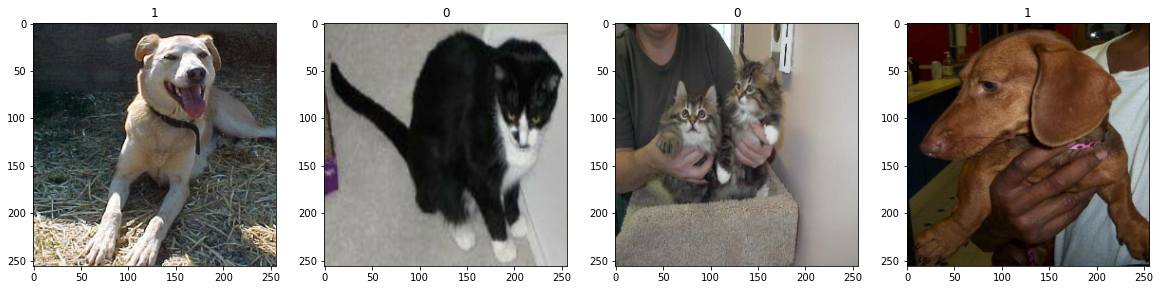

In [54]:
batch[1] #creates label there in batches
#0 means cat
#1 means dog
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for index, image in enumerate(batch[0][:4]):
    ax[index].imshow(image.astype(int))#convert as nupy array and show as image 
    ax[index].title.set_text(batch[1][index]) #show the correspomding label 

2.Preprocess data:
2.1.Scale data 

In [59]:
data = data.map(lambda x, y: (x/255, y))
#to apply a transformation to each element of the dataset.

#Lambda Function: The lambda function lambda x, y: (x/255, y) is applied to each element of the dataset:

#x: Represents the input data (images).
#y: Represents the labels associated with the input data.
#Normalization: (x/255): This part of the lambda function divides each pixel value in the input images (x) by 255. This is a standard technique in image processing and machine learning called normalization. Normalizing pixel values to the range [0, 1] helps the model converge faster during training.

#Returning the Transformed Data: The lambda function returns a tuple (x/255, y), where x/255 is the normalized image data and y remains unchanged (the original labels).

In [62]:
data.as_numpy_iterator().next()[0]
#convert in numpy array
#next is from next batch in the data 

array([[[[0.13169424, 0.12385111, 0.04149816],
         [0.15524974, 0.14740661, 0.06505366],
         [0.12941177, 0.12156863, 0.03921569],
         ...,
         [0.04574669, 0.04149445, 0.04118808],
         [0.03000381, 0.04223346, 0.02810513],
         [0.01936275, 0.03625919, 0.02053055]],

        [[0.12467293, 0.11682978, 0.03447685],
         [0.1490962 , 0.14125307, 0.05890012],
         [0.13316111, 0.12531798, 0.04296504],
         ...,
         [0.04643076, 0.03194724, 0.02185597],
         [0.03745404, 0.03921569, 0.02078654],
         [0.02810968, 0.03324142, 0.01336778]],

        [[0.12584887, 0.11800573, 0.03445794],
         [0.14590621, 0.13806307, 0.05451528],
         [0.14204963, 0.13420649, 0.0506587 ],
         ...,
         [0.09730285, 0.06482843, 0.04077926],
         [0.0588732 , 0.04134868, 0.01447191],
         [0.04918811, 0.0350337 , 0.00698529]],

        ...,

        [[0.7435968 , 0.76320463, 0.7396752 ],
         [0.7008272 , 0.72827816, 0.7008272 ]

2.2 Split Data

In [63]:
len(data)
# we have 32 batches from 2000 pictures=>2000/32=63 (in full number)

63

In [64]:
train_size= int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size) #take new data batches, not the same that are from train
test=data.skip(train_size+val_size).take(test_size) #skip 2 first data

3. Deep Model

3.1. Build Deep Learning Model

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,  Flatten , Dropout

In [73]:
model = Sequential()
#create instance fron Sequential class

In [74]:
#Adding convolutional layer
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))

#16 filters (get some patterns)
#3, 3 is the filter size
#1, means that we are moving everytime with filter by 1 pixels eight and down from the center point
#apply activation function, to get the nonlineariry in the data 

model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#Flatten the values 
model.add(Flatten())
#In a dense layer, each neuron receives input from all neurons in the previous layer, making it "fully connected."
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#0 or 1, we have classification. at the end we have only 1 label which represents dog or cat 



C:\Users\zbaizhik\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

4.Train model

In [81]:
logdir='logs'
#sets the directory where the logs will be saved. The logs are the data TensorBoard will read to generate visualizations
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# log events for TensorBoard, which is a tool for visualizing metrics such as loss and accuracy,
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])
#train the model on the training data (train) for a specified number of epochs (epochs=20).validation_data=val specifies the validation dataset to evaluate the model performance after each epoch.

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 553ms/step - accuracy: 0.5132 - loss: 0.7843 - val_accuracy: 0.5911 - val_loss: 0.6753
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.6243 - loss: 0.6456 - val_accuracy: 0.6146 - val_loss: 0.6578
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 862ms/step - accuracy: 0.7064 - loss: 0.5701 - val_accuracy: 0.6380 - val_loss: 0.6583
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.7263 - loss: 0.4938 - val_accuracy: 0.6641 - val_loss: 0.6395
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.8374 - loss: 0.3693 - val_accuracy: 0.6667 - val_loss: 0.6969
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.9030 - loss: 0.2718 - val_accuracy: 0.7188 - val_loss: 0.8044
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.9545 - loss: 0.1443 - val_accuracy: 0.7318 - val_loss: 0.8808
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 403ms/step - accuracy: 0.9698 - loss: 0.1089 - val_accur

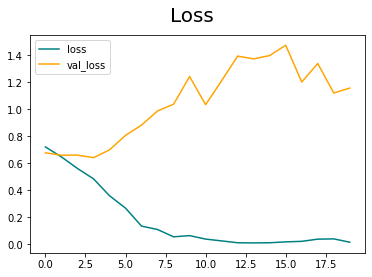

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

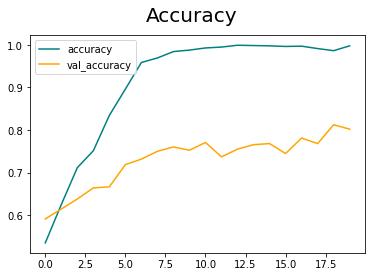

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

5.Evaluate model

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()
#insstances from the classes

In [88]:
for batch in test.as_numpy_iterator():
    X, y =batch
    yhat =model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [89]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.6636364, shape=(), dtype=float32) tf.Tensor(0.7019231, shape=(), dtype=float32) tf.Tensor(0.6458333, shape=(), dtype=float32)


6.Save the model

In [102]:
from tensorflow.keras.models import load_model
model.save(os.path.join('data','CNN_Model.h5'))
#analogy h5 is the zipping, h5 is the model type 


In [103]:
new_model = load_model(os.path.join('data','CNN_Model.h5') )

In [104]:
new_model

<Sequential name=sequential, built=True>